In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy

ten_year_source = os.path.join('EF_Data_Sets', '2008-2019_combined.xls')
ten_year_df = pd.read_excel(ten_year_source)

ten_year_df.count()

name                      2219
index year                2219
overall score             2124
property rights           2151
government integrity      2167
judicial effectiveness     554
tax burden                2140
government spending       2150
fiscal health              552
business freedom          2163
labor freedom             2161
monetary freedom          2154
trade freedom             2143
investment freedom        2155
financial freedom         2138
dtype: int64

In [17]:
current_year_source = os.path.join('EF_Data_Sets', 'index2019_data.xls')

region_col = [1, 3]
region_df = pd.read_excel(current_year_source, usecols = region_col)
region_df.rename(columns = {"Country Name": "name", "Region": "region"}, inplace = True)

region_df.head()

,name,region
0,Afghanistan,Asia-Pacific
1,Albania,Europe
2,Algeria,Middle East and North Africa
3,Angola,Sub-Saharan Africa
4,Argentina,Americas


In [18]:
primary_df = pd.merge(ten_year_df, region_df,  how = 'outer', on = 'name')
primary_df.count()

name                      2246
index year                2219
overall score             2124
property rights           2151
government integrity      2167
judicial effectiveness     554
tax burden                2140
government spending       2150
fiscal health              552
business freedom          2163
labor freedom             2161
monetary freedom          2154
trade freedom             2143
investment freedom        2155
financial freedom         2138
region                    1922
dtype: int64

In [19]:
primary_df.head()

,name,index year,overall score,property rights,government integrity,judicial effectiveness,tax burden,government spending,fiscal health,business freedom,labor freedom,monetary freedom,trade freedom,investment freedom,financial freedom,region
0,Afghanistan,2019.0,51.5,19.6,25.2,29.6,91.7,80.3,99.3,49.2,60.4,76.7,66.0,10.0,10.0,Asia-Pacific
1,Afghanistan,2018.0,51.3,17.9,26.2,28.2,91.8,79.3,98.3,53.0,57.3,77.8,66.0,10.0,10.0,Asia-Pacific
2,Afghanistan,2017.0,48.9,12.6,27.5,28.4,91.6,79.9,97.3,54.2,59.9,69.3,66.0,0.0,0.0,Asia-Pacific
3,Afghanistan,2016.0,NaN,NaN,12.0,NaN,91.6,81.2,NaN,56.6,63.2,NaN,NaN,55.0,NaN,Asia-Pacific
4,Afghanistan,2015.0,NaN,NaN,8.0,NaN,91.7,81.2,NaN,61.4,67.5,72.6,NaN,55.0,NaN,Asia-Pacific


In [20]:
#Import the 2010 and 2019 datasets
data_2010 = os.path.join('EF_Data_Sets', 'index2010_data.xls')
data_2019 = os.path.join('EF_Data_Sets', 'index2019_data.xls')

df_2010 = pd.read_excel(data_2010)
df_2019 = pd.read_excel(data_2019)
df_2019.head()

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,Afghanistan,35.5,69.6,2.505,2.9,1957.58,8.8,5.0,53.9,7.3
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,Albania,2.9,36,3.900,2.5,12506.6,13.9,2.0,1119.1,71.2
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,Algeria,41.5,632.9,2.000,3.1,15237.2,10,5.6,1203.0,25.8
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,Angola,28.2,190.3,0.700,2.9,6752.58,8.2,31.7,-2254.5,65.3
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,Argentina,44.1,920.2,2.900,0.7,20875.8,8.7,25.7,11857.0,52.6


In [21]:
# Rename the columns and merge the DataFrames together
df_2010 = df_2010[['name', 'index year', 'overall score']]
df_2019 = df_2019.rename(columns={'Country Name':'name', '2019 Score':'overall score'})
df_2019 = df_2019[['name', 'overall score']]

df_2019['year'] = '2019'
merged_df = pd.merge(df_2010, df_2019, on='name', how='left')
merged_df.count()

name               183
index year         183
overall score_x    179
overall score_y    151
year               156
dtype: int64

In [22]:
#Drop all countries with NaN since we cannot compare their scores over the last decade
merged_df = merged_df.dropna(how="any")

In [23]:
merged_df.count()

name               149
index year         149
overall score_x    149
overall score_y    149
year               149
dtype: int64

In [111]:
merged_df= merged_df.rename(columns={"index year": "year_2010", "overall score_x":"score_2010", "overall score_y": "score_2019",
                                    "year": "year_2019"})
merged_df.head()

,year_2010,score_2010,score_2019,year_2019
name,,,,
Albania,2010,66.0,66.5,2019
Algeria,2010,56.9,46.2,2019
Angola,2010,48.4,50.6,2019
Argentina,2010,51.2,52.2,2019
Armenia,2010,69.2,67.7,2019


In [113]:
#Reset the index
#merged_df = merged_df.reset_index(drop=True)
#merged_df = merged_df.set_index(["name"])
merged_df.head()


,year_2010,score_2010,score_2019,year_2019
name,,,,
Albania,2010,66.0,66.5,2019
Algeria,2010,56.9,46.2,2019
Angola,2010,48.4,50.6,2019
Argentina,2010,51.2,52.2,2019
Armenia,2010,69.2,67.7,2019


In [114]:
#Calculate the change in score for each country from 2010 to 2019
decade_change = ((merged_df["score_2019"]/merged_df["score_2010"])-1)*100
decade_change.head()

name
Albania       0.757576
Algeria     -18.804921
Angola        4.545455
Argentina     1.953125
Armenia      -2.167630
dtype: float64

In [115]:
# Find the top 10 largest change in overall score between 2019-2010 and put into DataFrame
top_10 = decade_change.nlargest(10)
top_10_df = pd.DataFrame(top_10)
top_10_df = top_10_df.rename(columns={0: "percent_change"})
top_10_df = top_10_df.round(1)
top_10_df

# Create dataframe for the top 10 countries with largest percentage increase

top_10_change = top_10_df.style.format({"percent_change": "{:,.1f}%".format})
top_10_change

,percent_change
name,
Zimbabwe,88.8%
Burma,46.0%
Seychelles,28.2%
Solomon Islands,27.3%
Guinea-Bissau,23.9%
Comoros,23.4%
Rwanda,20.3%
Belarus,18.9%
Indonesia,18.6%


In [116]:
#Sort the DataFrame by index year and by name
index_year_df = primary_df.sort_values(by=["index year", "name"], ascending=True)
index_year_df.head()

,name,index year,overall score,property rights,government integrity,judicial effectiveness,tax burden,government spending,fiscal health,business freedom,labor freedom,monetary freedom,trade freedom,investment freedom,financial freedom,region
11,Afghanistan,2008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia-Pacific
23,Albania,2008.0,62.4,30.0,26.0,NaN,90.3,76.0,NaN,55.6,49.5,80.4,75.8,70.0,70.0,Europe
35,Algeria,2008.0,56.2,30.0,31.0,NaN,77.0,74.6,NaN,73.6,57.0,80.2,68.8,40.0,30.0,Middle East and North Africa
47,Angola,2008.0,46.9,20.0,22.0,NaN,85.2,72.8,NaN,36.7,41.5,57.8,73.0,20.0,40.0,Sub-Saharan Africa
59,Argentina,2008.0,54.2,30.0,29.0,NaN,70.5,80.9,NaN,63.7,42.9,65.0,69.6,50.0,40.0,Americas


In [117]:
#Drop the rows containing data for years  2008 and 2009
index_year_df = index_year_df.rename(columns={"index year": "index_year", "overall score":  "overall_score"})
index_year_df = index_year_df[index_year_df.index_year != 2008.0]
index_year_df = index_year_df[index_year_df.index_year != 2009.0]

# Separate each of the top 10 countries into their own DataFrame
decade_df = index_year_df[["index_year", "name", "overall_score"]]
zimbabwe_df = decade_df[decade_df["name"] == "Zimbabwe"]
burma_df = decade_df[decade_df["name"] == "Burma"]
seychelles_df = decade_df[decade_df["name"] == "Seychelles"]
solomon_df = decade_df[decade_df["name"] == "Solomon Islands"]
guinea_df = decade_df[decade_df["name"] == "Guinea-Bissau"]
comoros_df = decade_df[decade_df["name"] == "Comoros"]
rwanda_df = decade_df[decade_df["name"] == "Rwanda"]
belarus_df = decade_df[decade_df["name"] == "Belarus"]
indonesia_df = decade_df[decade_df["name"] == "Indonesia"]
iran_df = decade_df[decade_df["name"] == "Iran"]

In [118]:
# Merge all DataFrames into one
highest10_df = pd.merge(zimbabwe_df, burma_df, how= "outer")
highest10_df = pd.merge(highest10_df, seychelles_df, how= "outer")
highest10_df = pd.merge(highest10_df, solomon_df, how= "outer")
highest10_df = pd.merge(highest10_df, guinea_df, how= "outer")
highest10_df = pd.merge(highest10_df, comoros_df, how= "outer")
highest10_df = pd.merge(highest10_df, rwanda_df, how= "outer")
highest10_df = pd.merge(highest10_df, belarus_df, how= "outer")
highest10_df = pd.merge(highest10_df, indonesia_df, how= "outer")
highest10_df = pd.merge(highest10_df, iran_df, how= "outer")

#Rename the columns so no spaces
highest10_df = highest10_df.rename(columns={"index year": "index_year", "overall score": "overall_score"})
highest10_df.head(10)

,index_year,name,overall_score
0,2010.0,Zimbabwe,21.4
1,2011.0,Zimbabwe,22.1
2,2012.0,Zimbabwe,26.3
3,2013.0,Zimbabwe,28.6
4,2014.0,Zimbabwe,35.5
5,2015.0,Zimbabwe,37.6
6,2016.0,Zimbabwe,38.2
7,2017.0,Zimbabwe,44.0
8,2018.0,Zimbabwe,44.0
9,2019.0,Zimbabwe,40.4


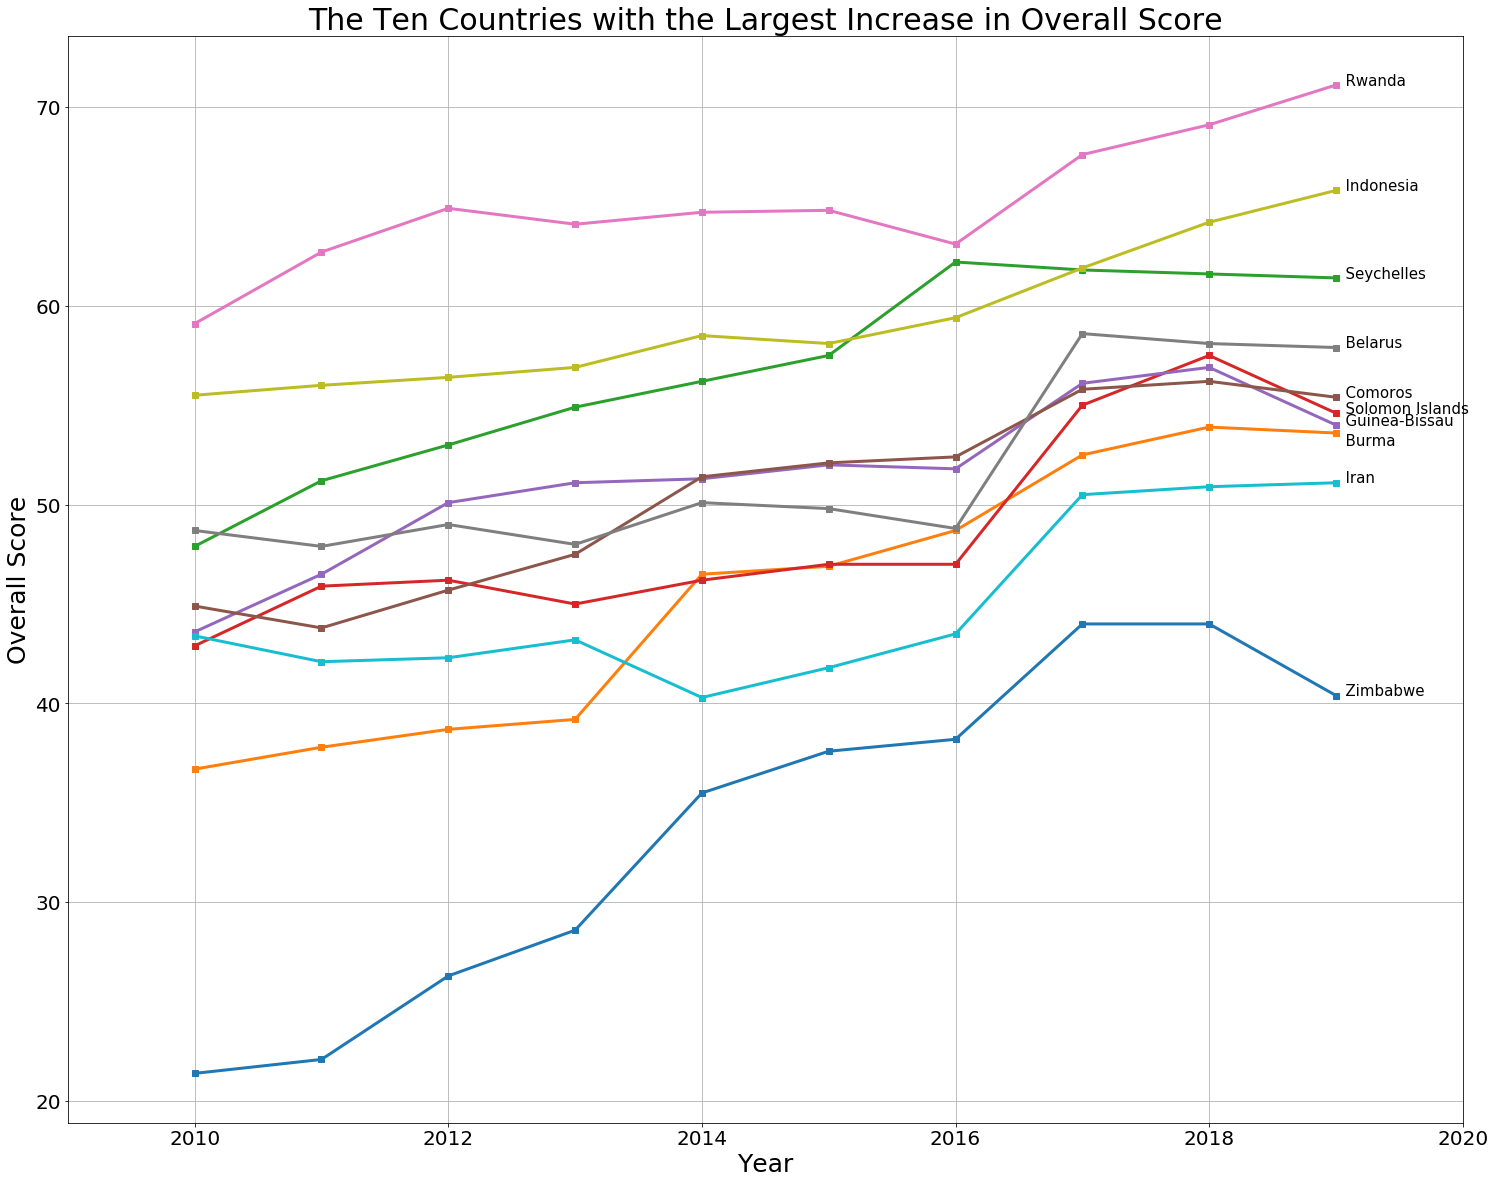

In [119]:
# Plot line chart for countries with most change in overall score
plt.figure(figsize=(25,20))
plt.plot(zimbabwe_df["index_year"], zimbabwe_df["overall_score"], linewidth=3, marker="s")
plt.plot(burma_df["index_year"], burma_df["overall_score"], linewidth=3, marker="s")
plt.plot(seychelles_df["index_year"], seychelles_df["overall_score"], linewidth=3, marker="s")
plt.plot(solomon_df["index_year"], solomon_df["overall_score"], linewidth=3, marker="s")
plt.plot(guinea_df["index_year"], guinea_df["overall_score"], linewidth=3, marker="s")
plt.plot(comoros_df["index_year"], comoros_df["overall_score"], linewidth=3, marker="s")
plt.plot(rwanda_df["index_year"], rwanda_df["overall_score"], linewidth=3, marker="s")
plt.plot(belarus_df["index_year"], belarus_df["overall_score"], linewidth=3, marker="s")
plt.plot(indonesia_df["index_year"], indonesia_df["overall_score"], linewidth=3, marker="s")
plt.plot(iran_df["index_year"], iran_df["overall_score"], linewidth=3, marker="s")

# Place a black text label at the end of each plotted line rather than use a legend
plt.text(2019, zimbabwe_df.overall_score.tail(1), "  Zimbabwe", horizontalalignment="left", fontsize=15, color="k")
plt.text(2019, burma_df.overall_score.tail(1), "  Burma", horizontalalignment="left", va="top", fontsize=15, color="k")
plt.text(2019, seychelles_df.overall_score.tail(1), "  Seychelles", horizontalalignment="left", fontsize=15, color="k")
plt.text(2019, solomon_df.overall_score.tail(1), "  Solomon Islands", horizontalalignment="left", fontsize=15, color="k")
plt.text(2019, guinea_df.overall_score.tail(1), "  Guinea-Bissau", horizontalalignment="left",  fontsize=15, color="k")
plt.text(2019, comoros_df.overall_score.tail(1), "  Comoros", horizontalalignment="left", fontsize=15, color="k")
plt.text(2019, rwanda_df.overall_score.tail(1), "  Rwanda", horizontalalignment="left", fontsize=15, color="k")
plt.text(2019, belarus_df.overall_score.tail(1), "  Belarus", horizontalalignment="left", fontsize=15, color="k")
plt.text(2019, indonesia_df.overall_score.tail(1), "  Indonesia", horizontalalignment="left", fontsize=15, color="k")
plt.text(2019, iran_df.overall_score.tail(1), "  Iran", horizontalalignment="left", fontsize=15, color="k")
#plt.legend()

# Title and label
plt.title("The Ten Countries with the Largest Increase in Overall Score", fontsize=30)
plt.ylabel("Overall Score", fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.xlim(2009,2020)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid()

#Save the figure
plt.savefig("top10_countries.png")

In [120]:
region_merge = pd.merge(merged_df, region_df,on='name', how='left')
region_merge["score_change"] = (region_merge["score_2019"]/region_merge["score_2010"]) * 100
region_merge.head()

,name,year_2010,score_2010,score_2019,year_2019,region,score_change
0,Albania,2010,66.0,66.5,2019,Europe,100.757576
1,Algeria,2010,56.9,46.2,2019,Middle East and North Africa,81.195079
2,Angola,2010,48.4,50.6,2019,Sub-Saharan Africa,104.545455
3,Argentina,2010,51.2,52.2,2019,Americas,101.953125
4,Armenia,2010,69.2,67.7,2019,Europe,97.832370


In [52]:
#highest_2019 = region_merge.nlargest(15, "score_2019", keep='first')
#highest_2019.reset_index(drop=True)

,name,year_2010,score_2010,score_2019,year_2019,region,score_change
0,Hong Kong,2010,89.7,90.2,2019,Asia-Pacific,100.557414
1,Singapore,2010,86.1,89.4,2019,Asia-Pacific,103.832753
2,New Zealand,2010,82.1,84.4,2019,Asia-Pacific,102.801462
3,Switzerland,2010,81.1,81.9,2019,Europe,100.986436
4,Australia,2010,82.6,80.9,2019,Asia-Pacific,97.941889
5,Ireland,2010,81.3,80.5,2019,Europe,99.015990
6,United Kingdom,2010,76.5,78.9,2019,Europe,103.137255
7,Canada,2010,80.4,77.7,2019,Americas,96.641791
8,United Arab Emirates,2010,67.3,77.6,2019,Middle East and North Africa,115.304606
9,Iceland,2010,73.7,77.1,2019,Europe,104.613297


In [53]:
# Find the top 10 change in overall score for 2019-2010
#top_10_reg = region_merge.nlargest(10, "score_change", keep='first')
#top_10_reg

,name,year_2010,score_2010,score_2019,year_2019,region,score_change
148,Zimbabwe,2010,21.4,40.4,2019,Sub-Saharan Africa,188.785047
21,Burma,2010,36.7,53.6,2019,Asia-Pacific,146.049046
118,Seychelles,2010,47.9,61.4,2019,Sub-Saharan Africa,128.183716
123,Solomon Islands,2010,42.9,54.6,2019,Asia-Pacific,127.272727
57,Guinea-Bissau,2010,43.6,54.0,2019,Sub-Saharan Africa,123.853211
32,Comoros,2010,44.9,55.4,2019,Sub-Saharan Africa,123.385301
112,Rwanda,2010,59.1,71.1,2019,Sub-Saharan Africa,120.304569
10,Belarus,2010,48.7,57.9,2019,Europe,118.891170
63,Indonesia,2010,55.5,65.8,2019,Asia-Pacific,118.558559
64,Iran,2010,43.4,51.1,2019,Middle East and North Africa,117.741935


In [121]:
#print(df_2019)
country_rank_2019 = df_2019.nlargest(5, "overall score")
country_rank_2019 = country_rank_2019.rename(columns={"overall score": "overall_score"})
print(country_rank_2019)

            name  overall_score  year
72     Hong Kong           90.2  2019
149    Singapore           89.4  2019
122  New Zealand           84.4  2019
160  Switzerland           81.9  2019
6      Australia           80.9  2019


In [122]:
country_rank_2010 = df_2010.nlargest(5, "overall score")
country_rank_2010 = country_rank_2010.rename(columns = {"overall score": "overall_score"})
print(country_rank_2010)

            name  index year  overall_score
68     Hong Kong        2010           89.7
144    Singapore        2010           86.1
6      Australia        2010           82.6
115  New Zealand        2010           82.1
75       Ireland        2010           81.3


In [124]:
country_2019 = country_rank_2019.name.values.tolist()
overallscore_2019 = country_rank_2019.overall_score.values.tolist()
country_2010 = country_rank_2010.name.values.tolist()
overallscore_2010 = country_rank_2010.overall_score.values.tolist()
#print(score)

Text(0.5, 1.0, '2019 Top 5 Countries with the Highest Economic Index')

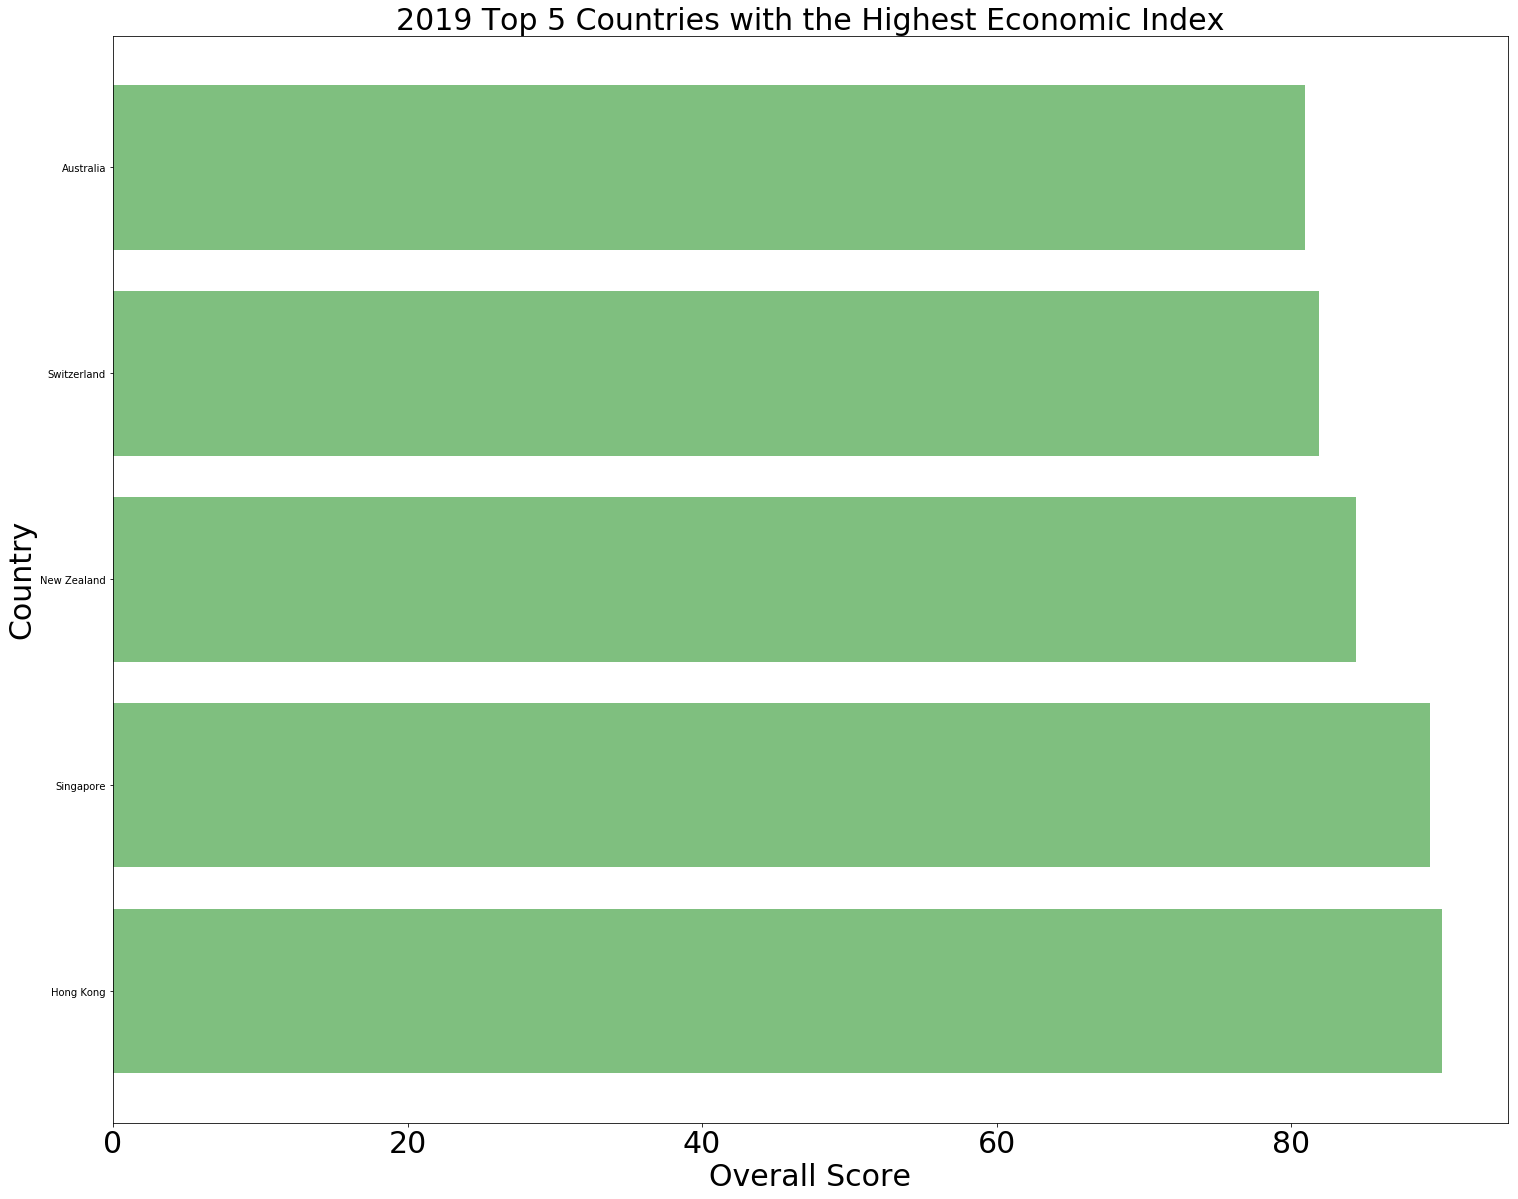

In [133]:
#Plot bar chart of countries with highest overall score
plt.figure(figsize=(25,20))
plt.barh(country_2019, overallscore_2019,align="center", alpha=0.5, color='g')

#plt.bar(country_2010, overallscore_2010)
plt.ylabel("Country", fontsize=30)
plt.xlabel("Overall Score", fontsize=30)
plt.xticks(fontsize = 30)
plt.title("2019 Top 5 Countries with the Highest Economic Index", fontsize=30)


In [142]:
hk_df = decade_df[decade_df["name"] == "Hong Kong"]
nkorea_df = decade_df[decade_df["name"] == "North Korea"]
us_df = decade_df[decade_df["name"] == "United States"]

us_compare_df = pd.merge(hk_df, nkorea_df, how= "outer")
us_compare_df = pd.merge(us_compare_df, us_df, how= "outer")

#Rename the columns so no spaces
us_compare_df = us_compare_df.rename(columns={"index year": "index_year", "overall score": "overall_score"})

In [143]:
us_compare_df.head()

,index_year,name,overall_score
0,2010.0,Hong Kong,89.7
1,2011.0,Hong Kong,89.7
2,2012.0,Hong Kong,89.9
3,2013.0,Hong Kong,89.3
4,2014.0,Hong Kong,90.1


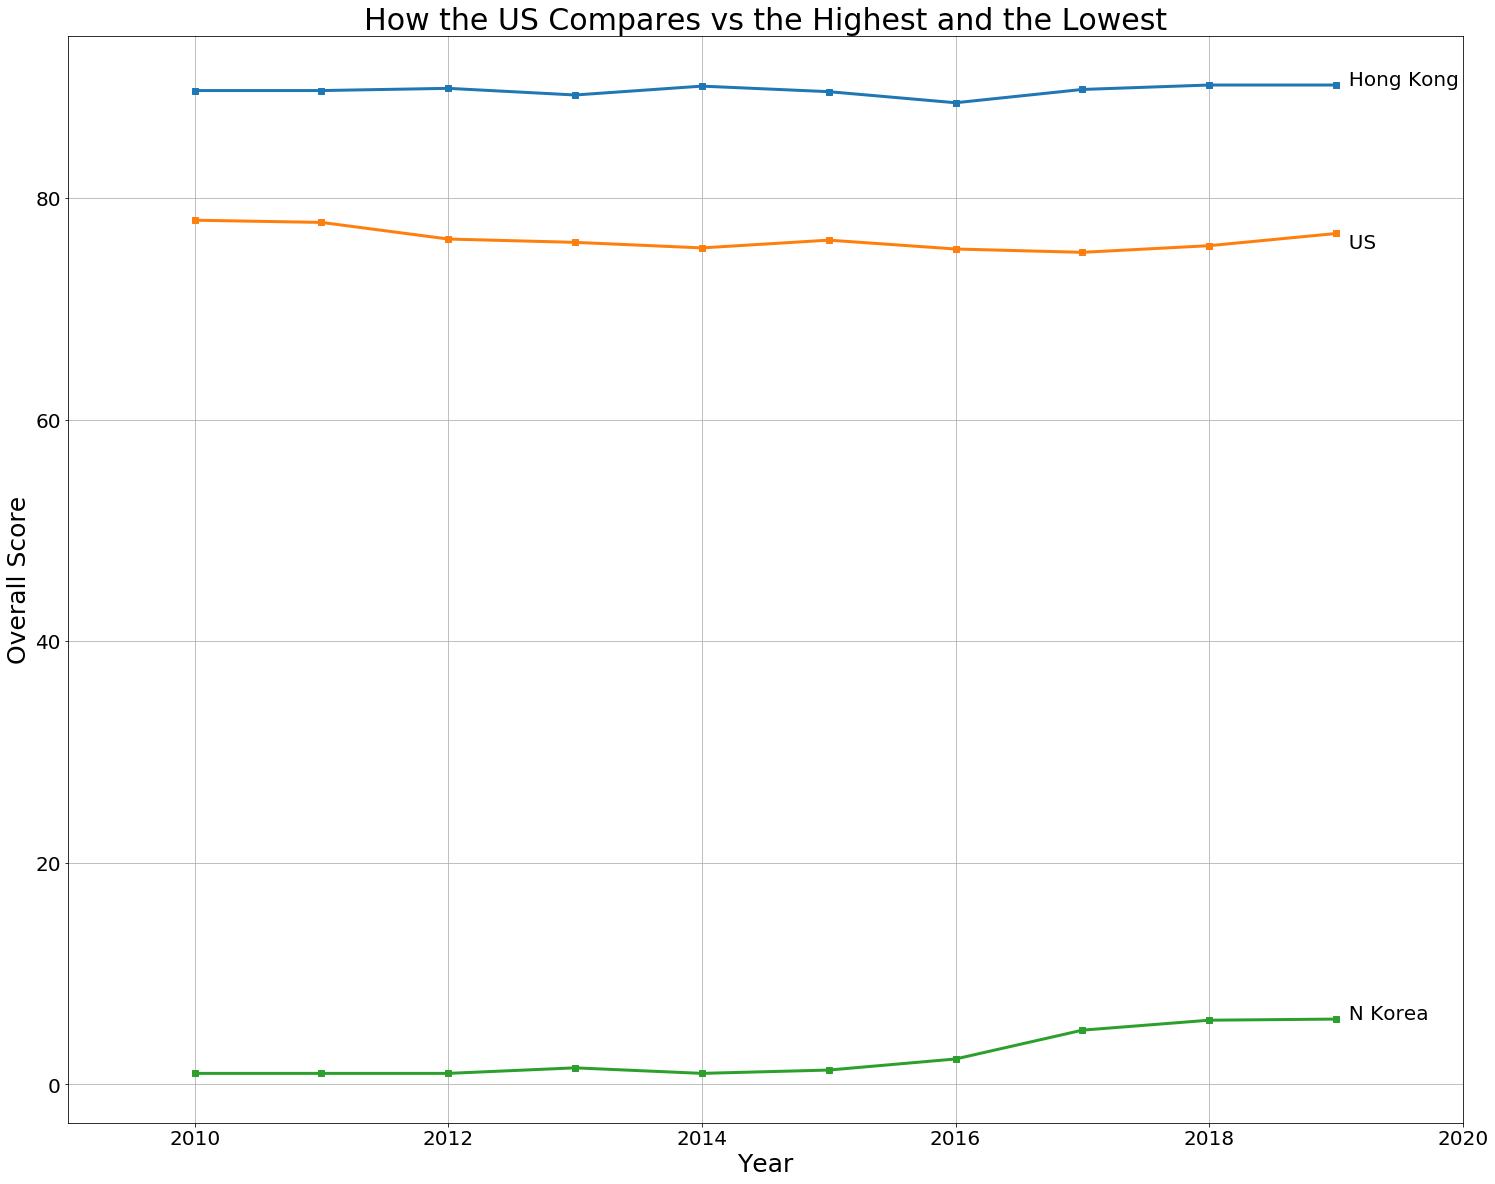

In [145]:
plt.figure(figsize=(25,20))
plt.plot(hk_df["index_year"], hk_df["overall_score"], linewidth=3, marker="s")
plt.plot(us_df["index_year"], us_df["overall_score"], linewidth=3, marker="s")
plt.plot(nkorea_df["index_year"], nkorea_df["overall_score"], linewidth=3, marker="s")

# Place a black text label at the end of each plotted line rather than use a legend
plt.text(2019, hk_df.overall_score.tail(1), "  Hong Kong", horizontalalignment="left", fontsize=20, color="k")
plt.text(2019, us_df.overall_score.tail(1), "  US", horizontalalignment="left", va="top", fontsize=20, color="k")
plt.text(2019, nkorea_df.overall_score.tail(1), "  N Korea", horizontalalignment="left", fontsize=20, color="k")

# Title and label
plt.title("How the US Compares vs the Highest and the Lowest", fontsize=30)
plt.ylabel("Overall Score", fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.xlim(2009,2020)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid()


In [151]:
index_year_df.head()

,name,index_year,overall_score,property rights,government integrity,judicial effectiveness,tax burden,government spending,fiscal health,business freedom,labor freedom,monetary freedom,trade freedom,investment freedom,financial freedom,region
9,Afghanistan,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia-Pacific
21,Albania,2010.0,66.0,35.0,34.0,NaN,92.6,74.2,NaN,68.0,52.1,78.7,85.8,70.0,70.0,Europe
33,Algeria,2010.0,56.9,30.0,32.0,NaN,83.5,73.4,NaN,71.2,56.4,77.2,70.7,45.0,30.0,Middle East and North Africa
45,Angola,2010.0,48.4,20.0,19.0,NaN,85.1,62.8,NaN,43.4,45.2,62.6,70.4,35.0,40.0,Sub-Saharan Africa
57,Argentina,2010.0,51.2,20.0,29.0,NaN,69.5,75.6,NaN,62.1,50.1,61.2,69.5,45.0,30.0,Americas


In [154]:
#Reset index
tired_df = index_year_df.reset_index(drop=True)
tired_df.head()
tired_df.count()

# Separate each of the top 10 countries into their own DataFrame
#new_info_df = index_year_df[["index_year", "name", "overall_score"]]
#index_2019_df = index_year_df[new_info_df["index_year"] == "2019.0"]
#index_2019_df

name                      1880
index_year                1853
overall_score             1788
property rights           1815
government integrity      1831
judicial effectiveness     554
tax burden                1804
government spending       1814
fiscal health              552
business freedom          1827
labor freedom             1825
monetary freedom          1818
trade freedom             1807
investment freedom        1819
financial freedom         1802
region                    1610
dtype: int64

In [162]:
pre_bin_df = tired_df[["name", "index_year", "overall_score"]]
pre_bin_df = pre_bin_df.dropna(how="any")
pre_bin_df.head()

,name,index_year,overall_score
1,Albania,2010.0,66.0
2,Algeria,2010.0,56.9
3,Angola,2010.0,48.4
4,Argentina,2010.0,51.2
5,Armenia,2010.0,69.2


In [183]:
pre_bin_df2 =pre_bin_df[pre_bin_df.index_year==2019.0]
pre_bin_df2=pre_bin_df2.reset_index(drop=True)
pre_bin_df2.head()

,name,index_year,overall_score
0,Afghanistan,2019.0,51.5
1,Albania,2019.0,66.5
2,Algeria,2019.0,46.2
3,Angola,2019.0,50.6
4,Argentina,2019.0,52.2


In [185]:
# Create bins and labels

score_bins = [0, 49.9, 59.9, 69.9, 79.9, 100]
#score_bins = [100, 80, 70, 60, 50, 0]
#score_labels = ["Free: >80", "Mostly Free: 70-79.9", "Moderately Free: 60-69.9", 
#               "Mostly UnFree: 50-59.9", "Repressed: <50"]
score_labels = ["Repressed: <50", "Mostly UnFree: 50-59.9", "Moderately Free: 60-69.9", 
               "Mostly Free: 70-79.9", "Free: >80"]
pd.cut(pre_bin_df2["overall_score"], score_bins, labels=score_labels)
#pre_bin_df2["efi_rank"] = pd.cut(pre_bin_df2["overall_score"], score_bins, labels=score_labels)
pre_bin_df2["rank"] = pd.cut(pre_bin_df2["overall_score"], score_bins, labels=score_labels)
pre_bin_df2.head()

,name,index_year,overall_score,rank
0,Afghanistan,2019.0,51.5,Mostly UnFree: 50-59.9
1,Albania,2019.0,66.5,Moderately Free: 60-69.9
2,Algeria,2019.0,46.2,Repressed: <50
3,Angola,2019.0,50.6,Mostly UnFree: 50-59.9
4,Argentina,2019.0,52.2,Mostly UnFree: 50-59.9


In [193]:
bin_group = pre_bin_df2.groupby("rank")
bin_group[["name", "overall_score"]].mean()

,overall_score
rank,
Repressed: <50,42.340909
Mostly UnFree: 50-59.9,55.056250
Moderately Free: 60-69.9,64.683051
Mostly Free: 70-79.9,74.468966
Free: >80,84.550000
